In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from utils import load_results_dataframe, load_position_dataframe, delete_file

In [2]:
seeds = [5, 10, 20]
times = [5, 20, 60]
angles = [15, 30, 60, 90]
speeds = [0.5, 1, 2, 4]
bts = list(np.arange(0.5, 20.5, 0.5)) #seconds
lp = 0.1 #seconds
wt = 5 #seconds
model = 'LinearMobility'
node = 1

full_df = pd.DataFrame()
for seed in seeds:
    for time in times:
        for angle in angles:
            for speed in speeds:
                path = f'../{model}/seed{seed}_time{time}_angle{angle}_speed{speed}'
                for bt in bts:
                    df = load_results_dataframe(node, bt, lp, wt, time, path)
                    df['seed'] = seed
                    df['time'] = time
                    df['angle'] = angle
                    df['speed'] = speed
                    full_df = pd.concat([full_df, df])
print('All CSVs Loaded, creating file')
full_df.to_csv(f'../{model}_results.csv')
print('Done creating file.')


KeyboardInterrupt: 

In [4]:
for seed in seeds:
    for time in times:
        for angle in angles:
            for speed in speeds:
                path = f'../{model}/seed{seed}_time{time}_angle{angle}_speed{speed}'
                for bt in bts:
                    delete_file(node, bt, lp, wt, path, 'results')

In [9]:
seeds = [5, 10, 20]
times = [5, 20, 60]
angles = [15, 30, 60, 90]
speeds = [0.5, 1, 2, 4]
bts = list(np.arange(1, 20.5, 0.5)) #seconds
lp = 0.1 #seconds
wt = 5 #seconds
model = 'LinearMobility'
node = 2

full_df = pd.DataFrame()
for seed in seeds:
    for time in times:
        for angle in angles:
            for speed in speeds:
                path = f'../{model}/seed{seed}_time{time}_angle{angle}_speed{speed}'
                for bt in bts:
                    print(f'{path}_bt')
                    df = load_position_dataframe(node, bt, lp, wt, time, path)
                    df['seed'] = seed
                    df['time'] = time
                    df['angle'] = angle
                    df['speed'] = speed
                    full_df = pd.concat([full_df, df])
full_df

../LinearMobility/seed5_time5_angle15_speed0.5_bt
../LinearMobility/seed5_time5_angle15_speed0.5_bt
../LinearMobility/seed5_time5_angle15_speed0.5_bt
../LinearMobility/seed5_time5_angle15_speed0.5_bt
../LinearMobility/seed5_time5_angle15_speed0.5_bt
../LinearMobility/seed5_time5_angle15_speed0.5_bt
../LinearMobility/seed5_time5_angle15_speed0.5_bt
../LinearMobility/seed5_time5_angle15_speed0.5_bt
../LinearMobility/seed5_time5_angle15_speed0.5_bt
../LinearMobility/seed5_time5_angle15_speed0.5_bt
../LinearMobility/seed5_time5_angle15_speed0.5_bt
../LinearMobility/seed5_time5_angle15_speed0.5_bt
../LinearMobility/seed5_time5_angle15_speed0.5_bt
../LinearMobility/seed5_time5_angle15_speed0.5_bt
../LinearMobility/seed5_time5_angle15_speed0.5_bt
../LinearMobility/seed5_time5_angle15_speed0.5_bt
../LinearMobility/seed5_time5_angle15_speed0.5_bt
../LinearMobility/seed5_time5_angle15_speed0.5_bt
../LinearMobility/seed5_time5_angle15_speed0.5_bt
../LinearMobility/seed5_time5_angle15_speed0.5_bt


MemoryError: Unable to allocate 533. MiB for an array with shape (1, 69804000) and data type float64

In [76]:
time = 60
seed = 5
speed = 0.5
angles = [15, 30, 60, 90]

angles_df = full_df[(full_df['time']==time) & (full_df['seed']==seed) & (full_df['speed']==speed) & (full_df['angle'].isin(angles))]
# full_df[(full_df['sim_time']==time)]
angles_df = angles_df.drop(["told_by", "hop", "start", "end", "sim_time"], axis=1).groupby(["node", "seen_id", "broadcast_time", "frequency", "angle", "seed", "speed", "time"], as_index=False).sum()

In [77]:
time = 60
seed = 5
speeds = [0.5, 1, 2, 4]
angle = 15

speeds_df = full_df[(full_df['time']==time) & (full_df['seed']==seed) & (full_df['speed'].isin(speeds)) & (full_df['angle']==angle)]
# full_df[(full_df['sim_time']==time)]
speeds_df = speeds_df.drop(["told_by", "hop", "start", "end", "sim_time"], axis=1).groupby(["node", "seen_id", "broadcast_time", "frequency", "angle", "seed", "speed", "time"], as_index=False).sum()

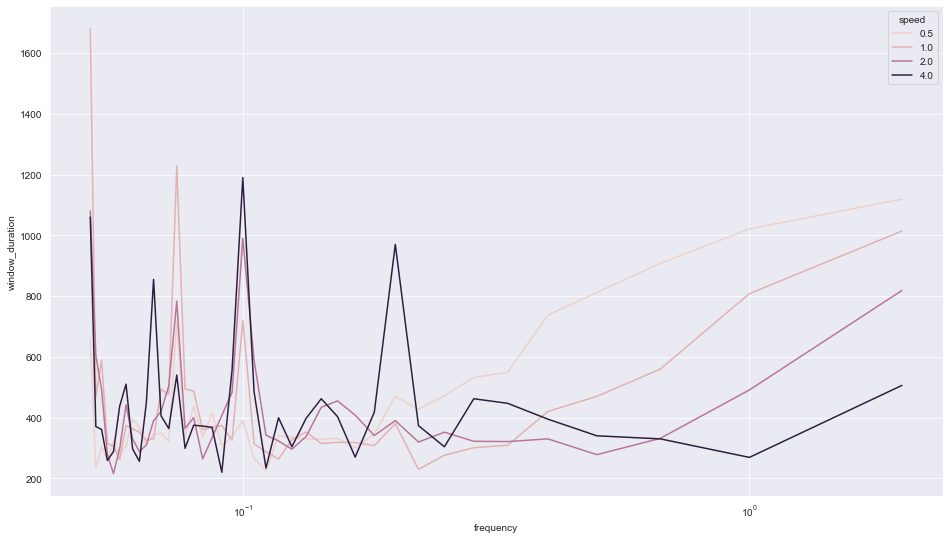

In [84]:
a4_dims = (16,9)
fig, ax = plt.subplots(figsize=a4_dims)
plot = sns.lineplot(data=speeds_df[['frequency', 'speed', 'window_duration']], x="frequency", y="window_duration", hue='speed')
plot.set(xscale='log')
plt.show()

In [1]:
a4_dims = (16,9)
fig, ax = plt.subplots(figsize=a4_dims)
plot = sns.lineplot(data=angles_df[['frequency', 'angle', 'window_duration']], x="frequency", y="window_duration", hue='angle')
# plot.set(xscale='log')
plt.show()

NameError: name 'plt' is not defined